In [49]:
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the traven insurance dataset
df = pd.read_csv('data/travelinsurance.csv')


In [50]:
le_cols = []
ohe_cols = []
for col in df.columns:
    if col == 'Claim':
        continue
    else:
        vals = df[col].head(5).tolist()
        if (all(isinstance(item, int) for item in vals) or (all(isinstance(item, float) for item in vals))):
            continue
        else:
            if df[col].nunique() > 2:
                le_cols.append(col)
            else:
                ohe_cols.append(col)

In [51]:
print("LabelEncoder columns: {}".format(le_cols))
print("OneHotEncoder columns: {}".format(ohe_cols))

LabelEncoder columns: ['Agency', 'Product Name', 'Destination']
OneHotEncoder columns: ['Agency Type', 'Distribution Channel', 'Gender']


In [52]:
# feature engineering:
from sklearn.preprocessing import LabelEncoder
for col in le_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

for col in ohe_cols:
    enc_df = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, enc_df], axis=1)

df = df.drop(ohe_cols, axis = 1)
df = df.drop(le_cols, axis = 1)

df['Claim'] = df.Claim.eq('Yes').mul(1)

df.head()

,Claim,Duration,Net Sales,Commision (in value),Age,Agency Type_Airlines,Agency Type_Travel Agency,Distribution Channel_Offline,Distribution Channel_Online,Gender_F,Gender_M
0,0,186,-29.0,9.57,81,0,1,1,0,1,0
1,0,186,-29.0,9.57,71,0,1,1,0,1,0
2,0,65,-49.5,29.70,32,0,1,0,1,0,0
3,0,60,-39.6,23.76,32,0,1,0,1,0,0
4,0,79,-19.8,11.88,41,0,1,0,1,0,0


In [60]:
# Arrange Data into Features Matrix and Target Vector
X = df.loc[:, df.columns != 'Claim']
y = df.loc[:, 'Claim'].values

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0)

# Random Forests in `scikit-learn` (with N = 100)
rf = RandomForestClassifier(n_estimators=100,
                            random_state=0,
                            max_depth=10)

rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, random_state=0)

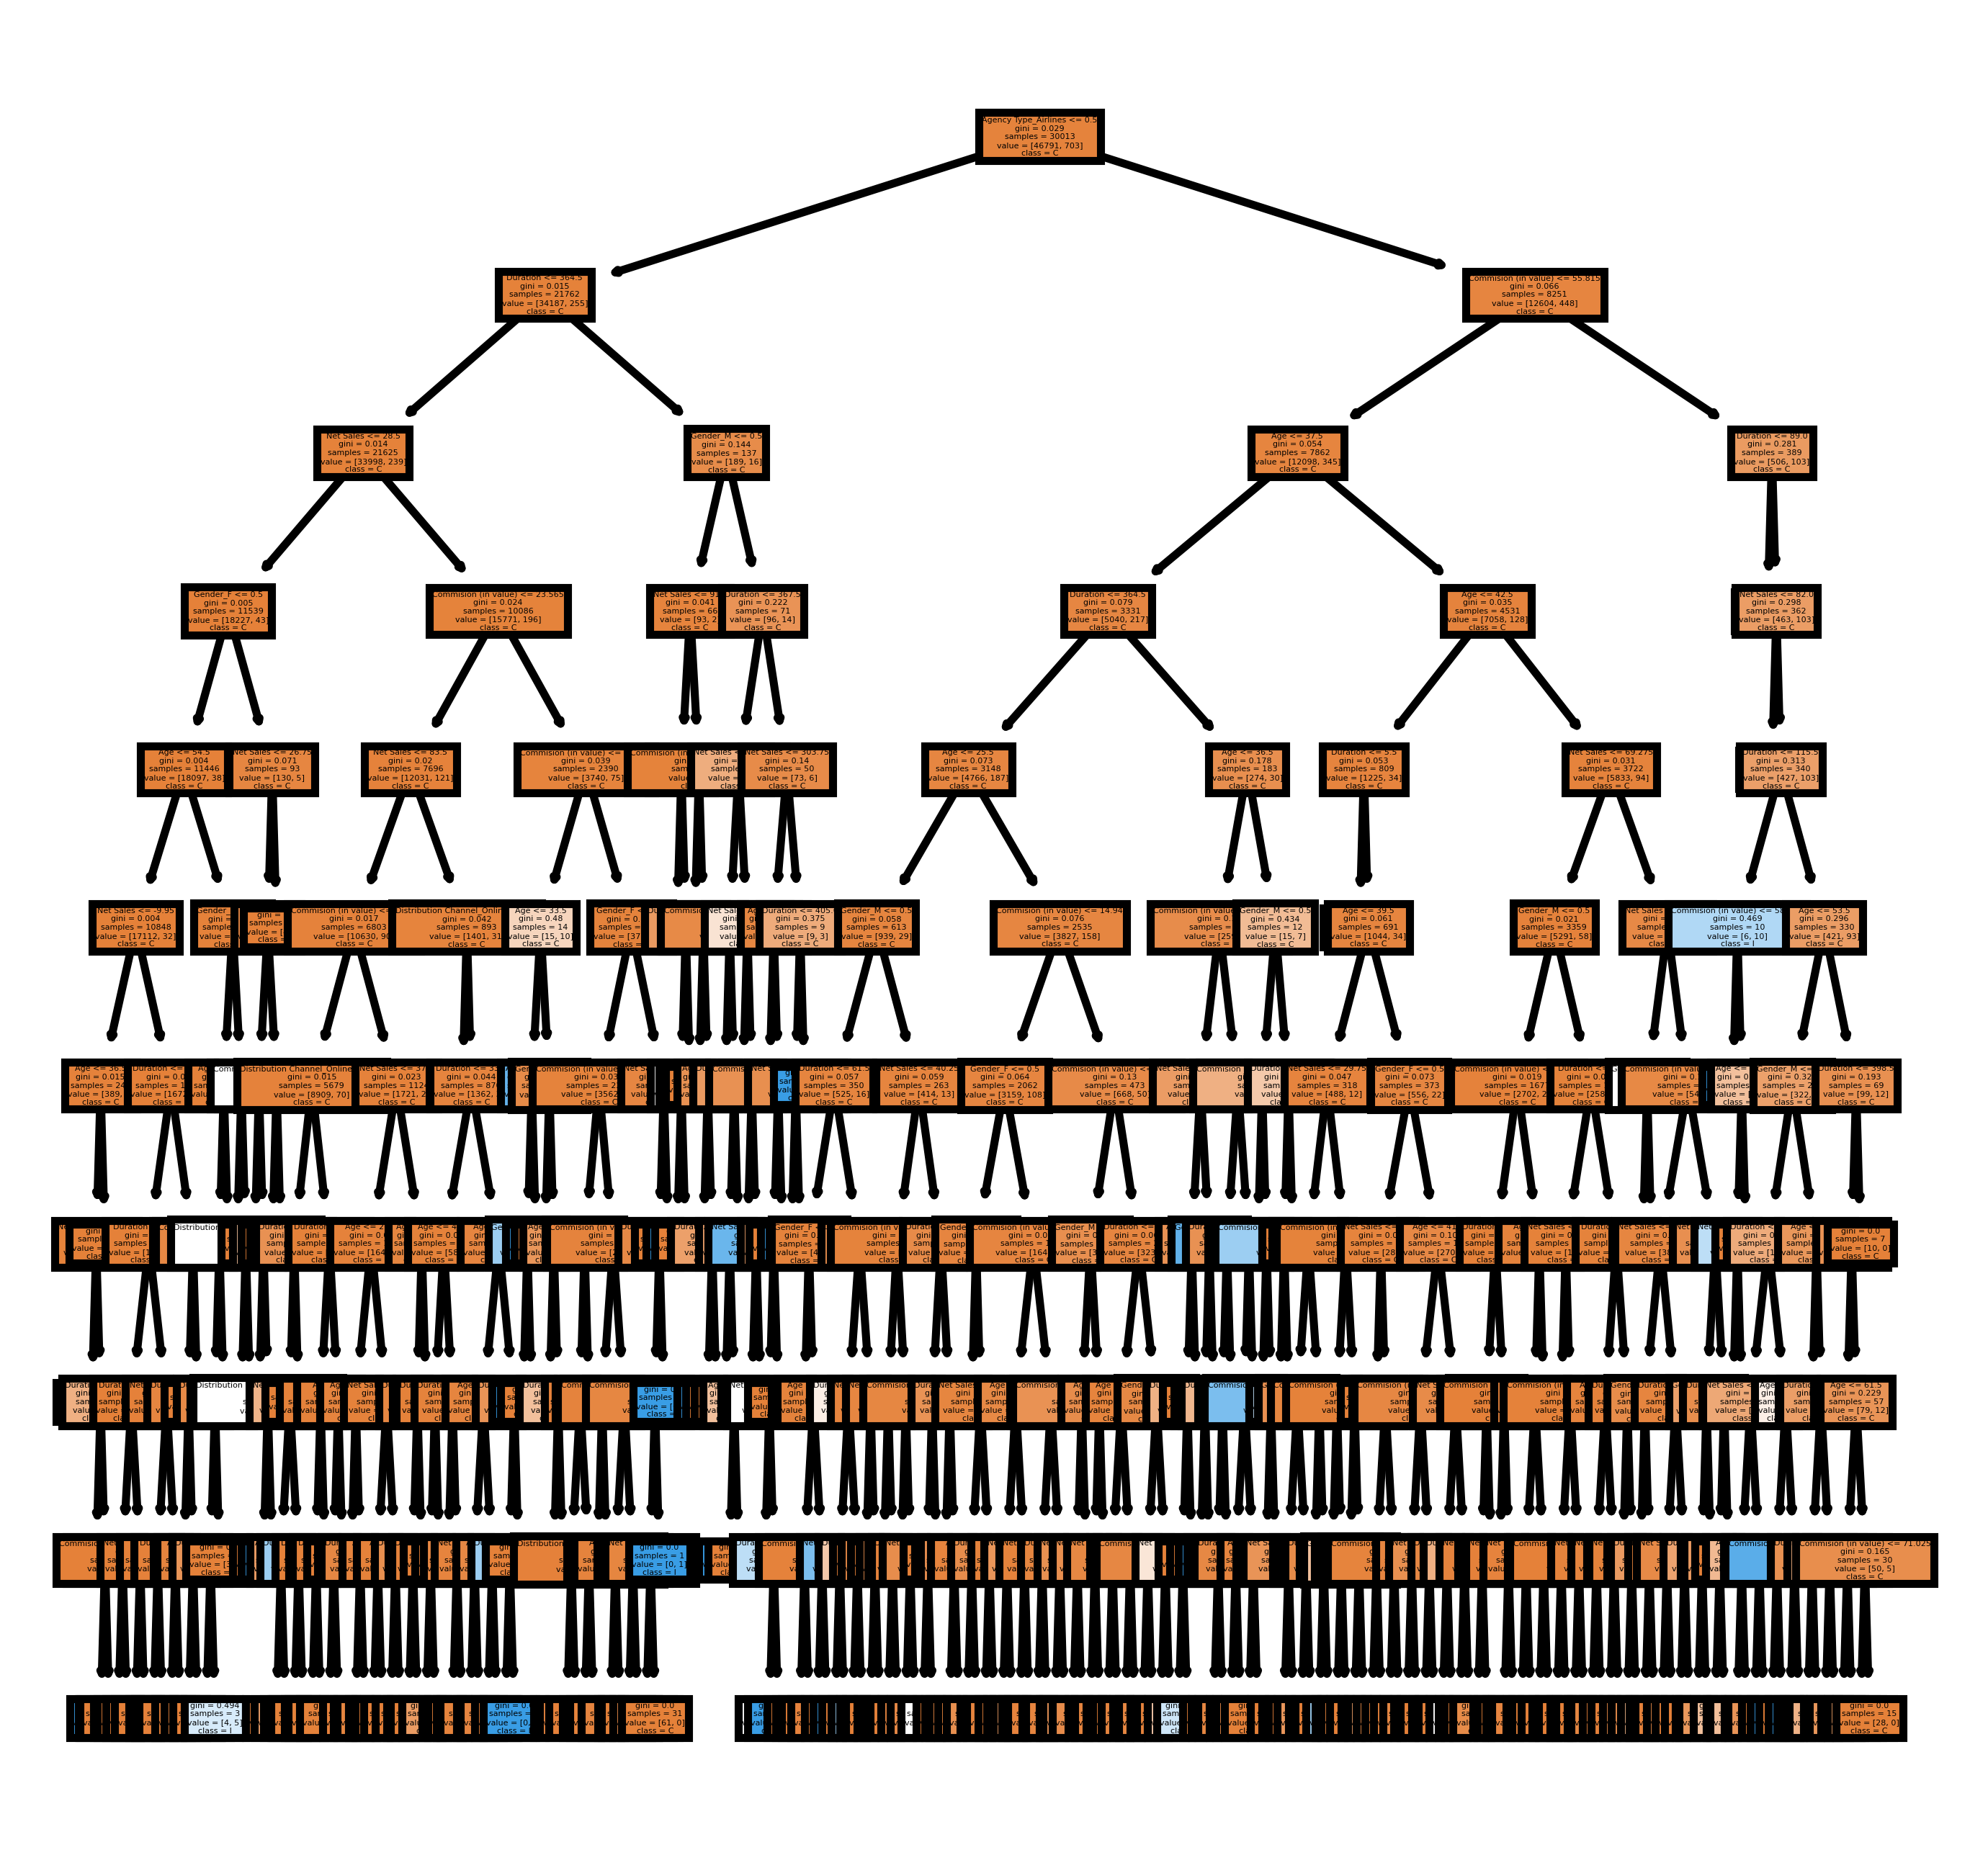

In [61]:
fn=X.columns
cn='Claim'
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

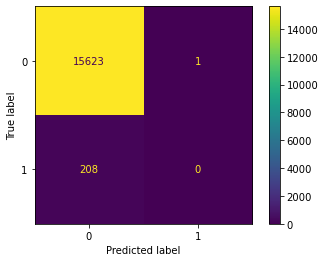

In [65]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test, Y_test)
plt.show()